# # IDS576: Assignment 2

### Solution 1

### 1.1 Get Xij: the number of users that liked both movies i and j. 

In [70]:
# Read data from file
import pandas as pd

df = pd.read_csv("C:/E!!/UIC/Semester SPRING 2017/IDS576_Adv_Predictive_Analytics/Assignments/Assgn2/movieratings.csv", header = None)
df.columns = ['Movie_ID','User_ID','Rating']

In [4]:
corr = df.groupby(['Movie_ID','Rating'])
import numpy as np
corr.aggregate(np.sum).head(5)

User_ID
Movie_ID Rating         
1        0         63218
         1        152391
2        0         38147
         1         26306
3        0         24743

In [7]:
movie_ids = df.Movie_ID.unique()
movie_ids_sorted = sorted(movie_ids) 
print(len(movie_ids))
#print(movie_ids_sorted)

1682


In [72]:
# Code for creating the co-occurrence matrix (Takes 120 mins approx)
# df.columns = ['Movie_ID','User_ID','Rating']
import numpy as np
corr =  np.zeros((1683, 1683))
for i in movie_ids_sorted:
    arr1 = df.loc[(df['Movie_ID'] == i) & (df['Rating'] == 1)]  # Array of users liking the movie i
    arr1_uid = arr1.User_ID
    for j in movie_ids_sorted:
        arr2 = df.loc[(df['Movie_ID'] == j) & (df['Rating'] == 1)]  # Array of users liking the movie j
        arr2_uid = arr2.User_ID
        corr[i][j] = len(list(set(arr1_uid).intersection(arr2_uid)))
np.savetxt("C:/E!!/UIC/Semester SPRING 2017/IDS576_Adv_Predictive_Analytics/Assignments/Assgn2/cooccurrence_matrix.csv", corr, delimiter=",")

In [42]:
# Access Co-occurrence matrix saved in the above location to save time for future runs.
df3 = pd.read_csv("C:/E!!/UIC/Semester SPRING 2017/IDS576_Adv_Predictive_Analytics/Assignments/Assgn2/cooccurrence_matrix.csv", header = None)
#df2[1][2]
df2 = df3/df3.values.max()


### 1.2 Optimize function using gradient descent

#### 1.2.1 when all the vectors are initialized to zeros

In [195]:
import matplotlib.pyplot as plt
np.random.seed(123)
movie_vec=np.zeros((1683,100))

def gradient_descent(v, Y, learning_rate, trials):
    
    #Initial value for the Gradient Descent Parameter
    step_size = learning_rate #Also called learning rate
    iterations=trials
    data_loss = np.zeros(iterations)
    coocc_dot_prod = np.zeros((1683,1683))

    # gradient descent loop
    for n in range(0,iterations):
        #print("iteration: ",n)
        for i in movie_ids_sorted:
            #if i % 100 == 0:
                #print("     i: ", i)
            for j in movie_ids_sorted:
                if (i != j):
                    coocc_dot_prod[i][j] = np.dot(v[i].T,v[j])  # 1683*1683 # and i < 1683 and j < 1683
            
        
        loss = np.sum(np.sum((coocc_dot_prod - Y)**2))
        
        #data_loss[n]=loss
        #print(loss)
        if n % 2 == 0:
            print("iteration: ", n, " | loss: ", loss)

        # compute the gradient
        dloss =np.dot(2*(coocc_dot_prod - Y),v)             # [1683*1683],[1683*100] = [1683,100]

        # perform a parameter update        
        v += -step_size * dloss
    
    print("coocc: ",coocc_dot_prod.shape)
    print("dloss: ",dloss.shape)
    print("Y: ",Y.shape)
    return v, data_loss;


#trial1 = gradient_descent(movie_vec,df2,0.00001,200)
trial2 = gradient_descent(movie_vec,df2,0.001,20)


iteration:  0  | loss:  698.2985685315965
iteration:  2  | loss:  698.2985685315965
iteration:  4  | loss:  698.2985685315965
iteration:  6  | loss:  698.2985685315965
iteration:  8  | loss:  698.2985685315965
iteration:  10  | loss:  698.2985685315965
iteration:  12  | loss:  698.2985685315965
iteration:  14  | loss:  698.2985685315965
iteration:  16  | loss:  698.2985685315965
iteration:  18  | loss:  698.2985685315965
coocc:  (1683, 1683)
dloss:  (1683, 100)
Y:  (1683, 1683)


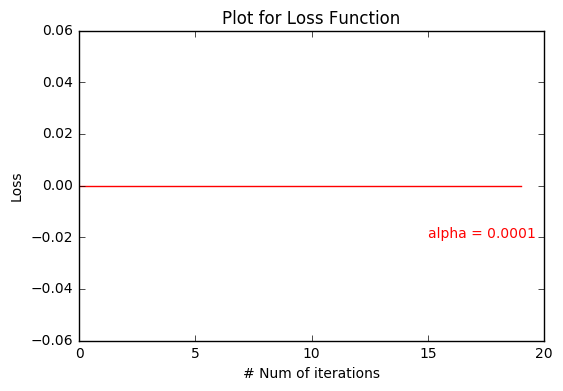

In [204]:
plt.plot(np.arange(0, 20),trial2[1],'r') # plotting t,a separately 
plt.xlabel("# Num of iterations")
plt.ylabel("Loss")
plt.title('Plot for Loss Function')
plt.text(15, max(trial1[1])-0.02, 'alpha = 0.0001' ,color = 'red')
plt.show()

#### 1.2.2 Each coordinate of each vector is i.i.d random uniform between [-0.7, 0.7]

In [205]:
import matplotlib.pyplot as plt
np.random.seed(123)
movie_vec=np.random.uniform(-0.7,0.7,(1683,300))

def gradient_descent(v, Y, learning_rate, trials,reg):
    
    #Initial value for the Gradient Descent Parameter
    step_size = learning_rate #Also called learning rate
    iterations=trials
    data_loss = np.zeros(iterations)
    coocc_dot_prod = np.zeros((1683,1683))

    # gradient descent loop
    for n in range(0,iterations):
        #print("iteration: ",n)
        for i in movie_ids_sorted:
            #if i % 100 == 0:
                #print("     i: ", i)
            for j in movie_ids_sorted:
                if (i != j):
                    coocc_dot_prod[i][j] = np.dot(v[i].T,v[j])  # 1683*1683 
            
        
        loss = np.sum(np.sum((coocc_dot_prod - Y)**2))
        reg_loss = 0.5*reg*np.sum(v*v)
        
        data_loss[n]=loss + reg_loss
        #print(loss)
        if n % 5 == 0:
            print("iteration: ", n, " | loss: ", data_loss[n])

        # compute the gradient
        dloss =np.dot(2*(coocc_dot_prod - Y),v)             # [1683*1683],[1683*100] = [1683,100]
        dloss += reg*v

        # perform a parameter update        
        v += -step_size * dloss
    
    print("coocc: ",coocc_dot_prod.shape)
    print("dloss: ",dloss.shape)
    print("Y: ",Y.shape)
    return v, data_loss;



#trial1 = gradient_descent(movie_vec,df2,0.001,200)
trial1 = gradient_descent(movie_vec,df2,0.0001,1000,0.0001)

iteration:  0  | loss:  22570775.522
iteration:  5  | loss:  8367655.09392
iteration:  10  | loss:  4614004.50723
iteration:  15  | loss:  2974391.09055
iteration:  20  | loss:  2092651.22576
iteration:  25  | loss:  1558486.72325
iteration:  30  | loss:  1208449.40636
iteration:  35  | loss:  965817.334752
iteration:  40  | loss:  790349.357846
iteration:  45  | loss:  659161.18459
iteration:  50  | loss:  558408.412952
iteration:  55  | loss:  479294.478277
iteration:  60  | loss:  416002.367455
iteration:  65  | loss:  364555.443516
iteration:  70  | loss:  322157.695759
iteration:  75  | loss:  286795.238575
iteration:  80  | loss:  256986.841314
iteration:  85  | loss:  231622.861495
iteration:  90  | loss:  209858.418964
iteration:  95  | loss:  191040.846874
iteration:  100  | loss:  174659.374545
iteration:  105  | loss:  160309.567426
iteration:  110  | loss:  147667.767588
iteration:  115  | loss:  136472.439039
iteration:  120  | loss:  126510.361757
iteration:  125  | loss:

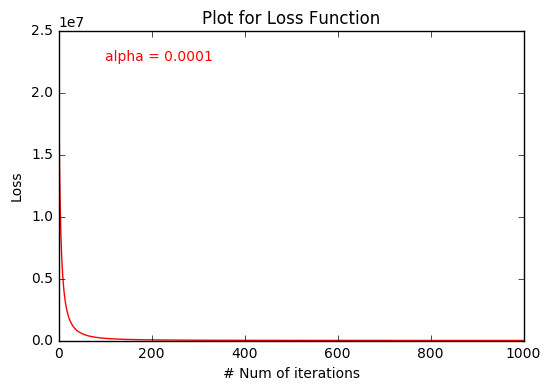

In [176]:
plt.plot(np.arange(0, 1000),trial1[1],'r') # plotting t,a separately 
plt.xlabel("# Num of iterations")
plt.ylabel("Loss")
plt.title('Plot for Loss Function')
plt.text(100, max(trial1[1])-0.2, 'alpha = 0.0001' ,color = 'red')
plt.show()

### 1.3 Recommend top 10 movies (not vectors or indices but movie names) given movie Aladdin.

Recommendation Strategy: We have used cosine-similarity to find how similar two movie vectors are and then have recommended the top 10 vectors.

In [177]:
df5= pd.read_csv("C:/E!!/UIC/Semester SPRING 2017/IDS576_Adv_Predictive_Analytics/Assignments/Assgn2/movies.csv", header = None, encoding='latin-1')
df5.columns = ['Movie_ID','Movie_Name','Junk']
df5.head(5)

,Movie_ID,Movie_Name,Junk
0,1,Toy Story (1995),NaN
1,2,GoldenEye (1995),NaN
2,3,Four Rooms (1995),NaN
3,4,Get Shorty (1995),NaN
4,5,Copycat (1995),NaN


In [178]:
# Get the movie ID of 'Aladdin'
def get_movie_ID(m_name):
    mid = df5.loc[(df5['Movie_Name'].str.contains(m_name)==True), ['Movie_ID']]
    #print(mid[0,])
    return mid;
    

In [179]:
from math import*

def square_rooted(x):
    return round(sqrt(sum([a*a for a in x])),3)

def cosine_similarity(x,y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)

In [183]:
def show_similar_movie(m_id):
    arr_similarity = np.zeros(1683)
    updated_movie_vec = trial1[0]
    for i in movie_ids_sorted:
        if(i != movie_id):
            arr_similarity[i] = cosine_similarity(updated_movie_vec[m_id],updated_movie_vec[i])
    top_10 = np.argsort(arr_similarity)[-10:]
    print("Top cosine similarity = ", np.sort(arr_similarity)[-5:])
    similar_movies = df5[df5['Movie_ID'].isin(top_10)]
    print(similar_movies[['Movie_ID','Movie_Name']].to_string(index=False))
    return;

In [184]:
movie_given = "Aladdin"
temp = get_movie_ID(movie_given)
movie_id = temp['Movie_ID'].iloc[0]
show_similar_movie(movie_id)

Top cosine similarity =  [ 0.243  0.244  0.264  0.281  0.308]
Movie_ID                         Movie_Name
      11               Seven (Se7en) (1995)
      22                  Braveheart (1995)
      50                   Star Wars (1977)
      79                           Fugitive
      98               Silence of the Lambs
     172                Empire Strikes Back
     174     Raiders of the Lost Ark (1981)
     265               Hunt for Red October
     318            Schindler's List (1993)
     423  E.T. the Extra-Terrestrial (1982)


### 1.4:  Recommend top 10 movies given movies Toy Story and Home Alone.

Recommendation Strategy: Given two movies M1 and M2, we have taken the average of the two movie vectors to get a new vector and then found cosine-similarity of this new vector with all other vectors to get the top 10 similar movies for recommendation. 

In [206]:
movie_given = "Toy Story"
temp = get_movie_ID(movie_given)
movie_id1 = temp['Movie_ID'].iloc[0]
print(movie_id1)

movie_given = "Home Alone"
temp = get_movie_ID(movie_given)
movie_id2 = temp['Movie_ID'].iloc[0]
print(movie_id2)

updated_movie_vec2 = trial1[0]
movie_vec = updated_movie_vec2[movie_id1] + updated_movie_vec2[movie_id2]
print(movie_vec.shape)

arr_similarity = np.zeros(1683)
updated_movie_vec = trial1[0]
for i in movie_ids_sorted:
    arr_similarity[i] = cosine_similarity(movie_vec,updated_movie_vec[i])
top_10 = np.argsort(arr_similarity)[-10:]
print("Top cosine similarity = ", np.sort(arr_similarity)[-5:])
similar_movies = df5[df5['Movie_ID'].isin(top_10)]
print(similar_movies[['Movie_ID','Movie_Name']].to_string(index=False))    

#show_similar_movie(movie_id)

1
94
(300,)
Top cosine similarity =  [ 0.317  0.32   0.324  0.677  0.799]
Movie_ID                       Movie_Name
       1                 Toy Story (1995)
       9          Dead Man Walking (1995)
      22                Braveheart (1995)
      94                Home Alone (1990)
      98             Silence of the Lambs
     127                        Godfather
     174   Raiders of the Lost Ark (1981)
     181        Return of the Jedi (1983)
     222  Star Trek: First Contact (1996)
     318          Schindler's List (1993)


In [173]:
df5.loc[df5['Movie_Name'].str.contains('Home Alone')]

,Movie_ID,Movie_Name,Junk
93,94,Home Alone (1990),NaN
893,894,Home Alone 3 (1997),NaN


In [174]:
df5.loc[df5['Movie_Name'].str.contains('Toy Story')]

,Movie_ID,Movie_Name,Junk
0,1,Toy Story (1995),NaN
